In [19]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [3]:
def gen_data(N, n_components):
    '''
    Generates synthetic data in the form of 'blobs'.
    Input: N (sample size), n_components (the number of blobs)
    Output: X, Y (datapoints and classes)
    
    Source: https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
    '''
    X, truth = make_blobs(n_samples=N, centers=n_components, 
                          cluster_std = [np.random.choice([2,3,4]) for i in range(n_components)], 
                          random_state=42)
    return X, truth

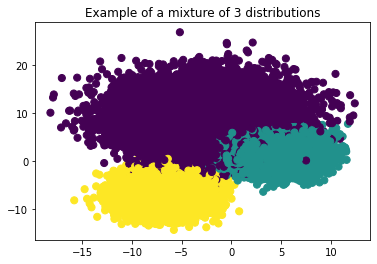

In [24]:
n_components = 3
x, y = gen_data(50000, n_components)
plt.scatter(x[:, 0], x[:, 1], s=50, c = y)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.plot();

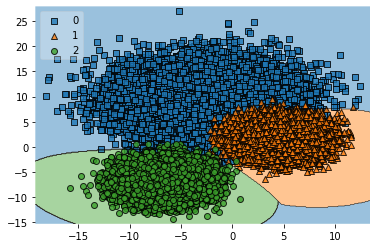

In [26]:
# Example SVM with decision boundary

# Training a classifier
svm_1 = svm.SVC(C=0.5, kernel='rbf')
svm_1.fit(x, y)


# Plotting decision regions
plot_decision_regions(x, y, clf=svm_1, legend=2)
plt.plot();

In [21]:
def get_svm_metrics(x, y):
    '''
    Input: x, y
    Output: training time, prediction time, accuracy
    Splits the data into train and test set,  trains a SVM, predicts accuracy 
    and times training and prediction.
    
    You may choose to split up the following tasks in individual functions. 
    '''
    training_time = 0
    prediction_time = 0
    # split data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    
    # specify the SVM with its kernel
    svm_1 = svm.SVC(C=0.5, kernel='rbf')

    # time and train (fit) the classifier
    start_time = time.time()
    svm_1.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # time and predict the train data
    start_time = time.time()
    y_pred = svm_1.predict(X_test)
    prediction_time = time.time() - start_time
    
    # get accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # return training time, prediction time, accuracy
    
    return training_time, prediction_time, accuracy

In [22]:
def multiple_metrics(data_sizes, n_components):
    '''
    Input: array of data sizes
    Output: array of dictionaries with data size, training time, classification time and 
    accuracy for each data size
    
    Runs a for loop on all data sizes and 
    '''
    
    d = []
    
    for N in data_sizes:

        (x, y) = gen_data(N, n_components)
        (training_time,  classification_time, accuracy) = get_svm_metrics(x,y)
        
        d.append({
                '1 data_size': N,
                '2 training_time': training_time, 
                '3 classification_time': classification_time,
                '4 accuracy': accuracy
                 })
        
    return d

In [23]:
# example data sizes and metrics (output not shown)
data_sizes = [10000, 20000, 30000, 40000, 50000]
n_components = 3  # number of classes, blobs
metrics = multiple_metrics(data_sizes, n_components)
pd.DataFrame(metrics)

,1 data_size,2 training_time,3 classification_time,4 accuracy
0,10000,0.082686,0.030521,0.965152
1,20000,0.110866,0.049538,0.992273
2,30000,0.216023,0.092152,0.991111
3,40000,1.611198,0.697290,0.953409
4,50000,4.062771,1.433684,0.925818
